# Data Exploration
In this notebook, we will explore the `rime_series.csv` file that we have been provided for the paper `Predicting food insecurity through news streams`. The paper uses IPC classfiications from `fews.net` for ground truth data. 

The **Integrated Food Security Phase Classification (IPC)** is a standardized system used to **assess and classify food insecurity levels**. It helps governments, humanitarian organizations, and policymakers make informed decisions about **food crises, early warning systems, and response planning**.

---

##### **🟢 IPC Classification Phases**
The IPC system classifies food insecurity into **five phases**, with each phase indicating the severity of the crisis:

| **IPC Phase** | **Classification**       | **Description** |
|--------------|------------------------|----------------|
| **1** 🟢 | **Minimal Food Insecurity** | Households can meet their food and non-food needs without external assistance. |
| **2** 🟡 | **Stressed** | Households have minimally adequate food consumption but are at risk of deterioration if shocks occur. |
| **3** 🟠 | **Crisis** | Households face food consumption gaps that lead to malnutrition or they must resort to severe coping strategies. |
| **4** 🔴 | **Emergency** | Households experience large food consumption gaps, leading to high acute malnutrition and excessive mortality. |
| **5** 🚨 | **Famine** | A catastrophic situation where starvation, death, and destitution are widespread. Requires immediate action. |

## Initialisation

In [2]:
# %pip install pandas folium numpy matplotlib seaborn gdown --break-system-packages --quiet

In [3]:

import pandas as pd
import numpy as np
import folium
from IPython.display import display, Image
import os
import gdown
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = "https://drive.google.com/uc?id=1YoQ1hz9RlaLr2xW3KoKCfJPyyO2PErym"
output = "data.zip"

if not os.path.exists("./data"):
    gdown.download(url, output, quiet=False) 
    zipfile.ZipFile('data.zip', 'r').extractall()
else:
    print("You already have the data downloaded and extracted")

You already have the data downloaded and extracted


In [5]:
df_time_series = pd.read_csv("./data/time_series_with_causes_zscore_full.csv")

In [6]:
data = {
    "Seed keyphrase": [
        "famine", "food insecurity", "malnourished", "malnutrition",
        "food crisis", "starvation", "hunger crises", "shortage of food",
        "life-threatening hunger", "lack of food", "scarcity of food",
        "acute hunger", "dearth of food"
    ],
    "Number of articles containing frames": [
        25637, 25404, 12102, 10372, 10154, 8012, 6518, 5482,
        1895, 1266, 1058, 1043, 891
    ]
}

pd.DataFrame(data)


,Seed keyphrase,Number of articles containing frames
0,famine,25637
1,food insecurity,25404
2,malnourished,12102
3,malnutrition,10372
4,food crisis,10154
5,starvation,8012
6,hunger crises,6518
7,shortage of food,5482
8,life-threatening hunger,1895
9,lack of food,1266


In [7]:
def pretty_print_list(list_to_print):
    formatted_columns = "\n- " + "\n- ".join(list_to_print)  
    formatted_columns = sorted(list_to_print)
    print("\n- " + "\n- ".join(formatted_columns))

## Time series CSV

In this section, we will analyze the data from the `time-series.csv` file.

In [8]:
df_time_series.head(5)

,Unnamed: 0,index,country,admin_code,admin_name,centx,centy,year_month,year,month,...,carbon_2,mayhem_0,mayhem_1,mayhem_2,dehydrated_0,dehydrated_1,dehydrated_2,mismanagement_0,mismanagement_1,mismanagement_2
0,0,30,Afghanistan,202,Kandahar,65.709343,31.043618,2009_07,2009,7,...,1.053000,0.667000,-0.171000,-0.833000,0.173667,0.168000,1.284667,-0.073000,-0.427667,0.668333
1,1,33,Afghanistan,202,Kandahar,65.709343,31.043618,2009_10,2009,10,...,-0.660812,-0.636580,-0.520247,-0.782913,-0.671587,-0.612254,-0.926921,-0.510467,-0.625133,-0.452467
2,2,36,Afghanistan,202,Kandahar,65.709343,31.043618,2010_01,2010,1,...,-0.134333,1.447667,-0.844333,0.778667,-0.676000,-0.689667,0.293333,0.530333,-0.471333,0.955333
3,3,39,Afghanistan,202,Kandahar,65.709343,31.043618,2010_04,2010,4,...,-0.326927,-0.594877,0.164790,-0.905210,-0.620540,0.165794,0.045794,-1.011600,-0.810600,-0.205600
4,4,42,Afghanistan,202,Kandahar,65.709343,31.043618,2010_07,2010,7,...,-1.085146,-0.709913,-0.867913,-0.770247,-0.787921,-0.974587,-0.946921,-0.611133,-0.709800,-0.622800


Unlike previous datasets, this has more columns. 

The unnamed column is again the redundant index of the data frame and I will drop it. The `year_month` column is a combination of the year and month columns it seems.

In [9]:
df_time_series.drop_duplicates(inplace=True)
df_time_series.drop(columns=["Unnamed: 0"], inplace=True) 

In [10]:
df_time_series[:100].to_csv("time_series_sample.csv", index=False)

In [11]:
print("No. of rows : ", df_time_series.shape[0])
print("No. of columns : ", df_time_series.shape[1])

No. of rows :  40952
No. of columns :  531


In [12]:
print("The data ranges from the year ", df_time_series['year'].min(), " to ", df_time_series['year'].max())

The data ranges from the year  2009  to  2020


In [13]:
unique_countries = df_time_series['country'].unique()
formatted_countries = "\n- " + "\n- ".join(sorted(unique_countries))

print(f"\n🌍 The dataset covers the following {len(unique_countries)} countries:\n")
print(formatted_countries)


🌍 The dataset covers the following 21 countries:


- Afghanistan
- Burkina Faso
- Chad
- Democratic Republic of Congo
- Ethiopia
- Guatemala
- Haiti
- Kenya
- Malawi
- Mali
- Mauritania
- Mozambique
- Niger
- Nigeria
- Somalia
- South Sudan
- Sudan
- Uganda
- Yemen
- Zambia
- Zimbabwe


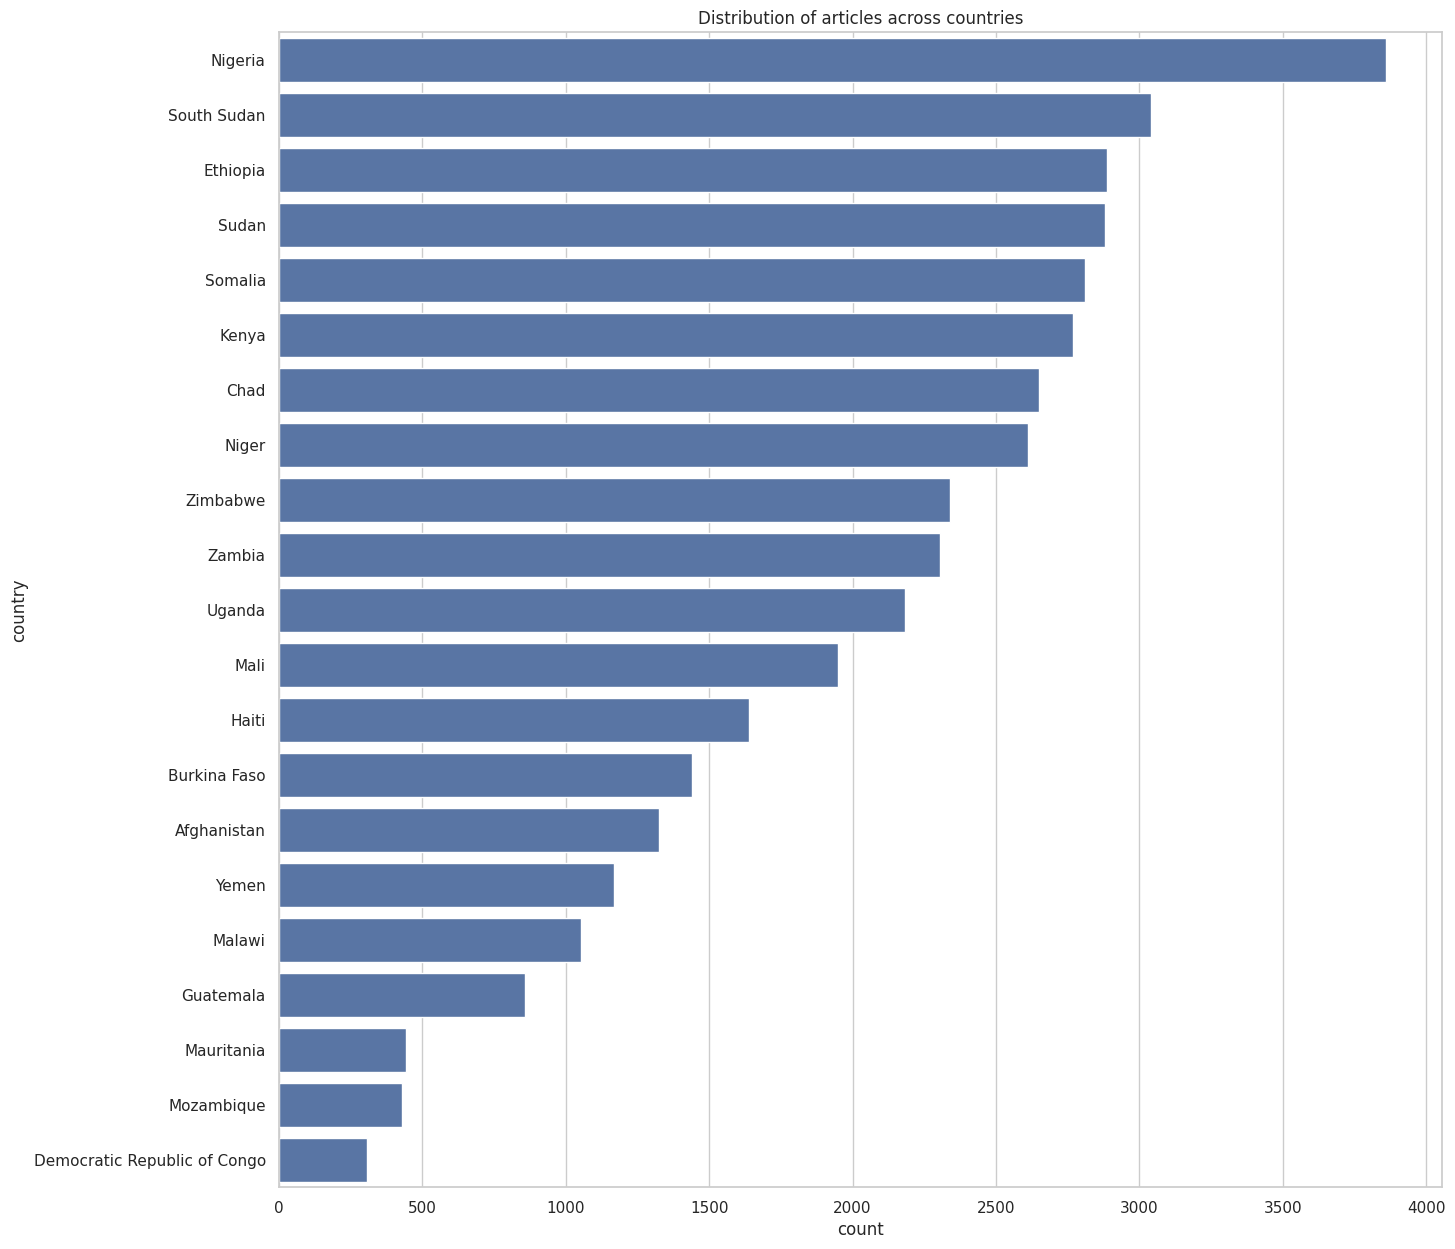

In [38]:
plt.figure(figsize=(15, 15))
plt.title("Distribution of articles across countries")
sns.countplot(y='country', data=df_time_series, order = df_time_series['country'].value_counts().index)
plt.show()


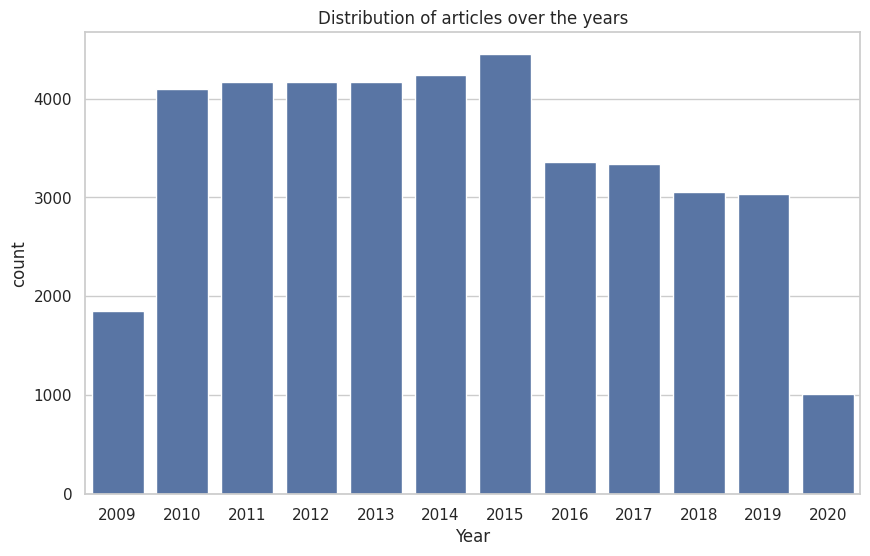

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df_time_series)
plt.xlabel("Year")
plt.title("Number of articles over the years")
plt.show()

In [14]:
countries_mentioned_in_paper_set = set(
    ["Afghanistan", "Burkina Faso", "Chad", "Democratic Republic of the Congo", "Ethiopia", 
    "Guatemala", "Haiti", "Kenya", "Malawi", "Mali", "Mauritania", "Mozambique", "Niger", 
    "Nigeria", "Somalia", "South Sudan", "Sudan", "Uganda", "Republic of Yemen", "Zambia", 
    "Zimbabwe"]
)

extra_countries = set(unique_countries) - countries_mentioned_in_paper_set
formatted_difference = "\n- " + "\n- ".join(sorted(list(extra_countries)))
print(f"Countries in dataset that are not mentioned in paper are {formatted_difference}")

missing_countries = countries_mentioned_in_paper_set - set(unique_countries)
formatted_missing = "\n- " + "\n- ".join(sorted(list(missing_countries)))
print(f"\n\nCountries mentioned in paper that are not in dataset are {formatted_missing}")


Countries in dataset that are not mentioned in paper are 
- Democratic Republic of Congo
- Yemen


Countries mentioned in paper that are not in dataset are 
- Democratic Republic of the Congo
- Republic of Yemen


Okay so upon manual inspected, the countries the mismatch in country names is just due to some phrasing and spelling issues as can be seen above. Otherwise both have the same countries.

The next question is what do `admin_code` and `admin_name` mean? I think `admin_code` is the administrative code identifying the district or region. and `admin_name` is the name of the administrative unit (district/county). I will check this by checking if the `admin_code` is unique for each `admin_name`.

In [15]:
check_uniqueness = df_time_series[["admin_name", "admin_code"]].drop_duplicates()
check_uniqueness = check_uniqueness.duplicated(subset=["admin_name"], keep=False)
check_uniqueness[check_uniqueness == True]

Series([], dtype: bool)

The above code shows that each admin name has only one admin code so my assumption was correct.

In [16]:
unique_districts = df_time_series['admin_name'].unique()

print(f"\n🏙️ The dataset covers the following {len(unique_districts)} districts:\n")

# pretty_print_list(unique_districts)


🏙️ The dataset covers the following 1142 districts:



The paper mentions:
> The dataset used for the results presented contains 40,952 quarterly observations across `1162` districts in 21 countries over the period from July 2009 to February 2020. 

From the data, we can see that there are 1142 unique districts in the dataset. 20 districts are missing.

In [17]:
columns_list = df_time_series.columns.to_list()

formatted_columns = "\n- " + "\n- ".join(columns_list)  

print("\n🗂️ The column names in the dataset are as follows:\n")
formatted_columns = sorted(columns_list)
print("\n- " + "\n- ".join(formatted_columns))


🗂️ The column names in the dataset are as follows:


- abnormally low rainfall_0
- abnormally low rainfall_1
- abnormally low rainfall_2
- acled_count
- acled_fatalities
- acute hunger_0
- acute hunger_1
- acute hunger_2
- admin_code
- admin_name
- aid appeal_0
- aid appeal_1
- aid appeal_2
- aid workers died_0
- aid workers died_1
- aid workers died_2
- air attack_0
- air attack_1
- air attack_2
- alarming level_0
- alarming level_1
- alarming level_2
- anti-western policies_0
- anti-western policies_1
- anti-western policies_2
- apathy_0
- apathy_1
- apathy_2
- area
- asylum seekers_0
- asylum seekers_1
- asylum seekers_2
- authoritarian_0
- authoritarian_1
- authoritarian_2
- bad harvests_0
- bad harvests_1
- bad harvests_2
- blockade_0
- blockade_1
- blockade_2
- bombing campaign_0
- bombing campaign_1
- bombing campaign_2
- brain drain_0
- brain drain_1
- brain drain_2
- brutal government_0
- brutal government_1
- brutal government_2
- burning houses_0
- burning houses_1
- burnin

Okay so going through the column names, a lot of these columns have a _0, _1, _2 at the end of their names. It seems to me that a lot of these column names correspond to indicator features (oth traditional and news based). The paper does mention that they will compare how good traditional factors are at predicting food insecurity as compared to news based factors so this makes sense. But why are there 3 columns for each feature ending with 0, 1 and 2? Are these measurements at district, province and country level? 

In [18]:
non_indicator_columns = [name for name in columns_list if not name.endswith(("_0", "_1", "_2"))]

print("\n📊 NON-INDICATOR COLUMNS 📊")
pretty_print_list(non_indicator_columns)



📊 NON-INDICATOR COLUMNS 📊

- acled_count
- acled_fatalities
- admin_code
- admin_name
- area
- centx
- centy
- change_fews
- country
- cropland_pct
- et_anom
- et_mean
- fews_ha
- fews_ipc
- fews_proj_med
- fews_proj_med_ha
- fews_proj_near
- fews_proj_near_ha
- index
- month
- ndvi_anom
- ndvi_mean
- p_staple_food
- pasture_pct
- pop
- rain_anom
- rain_mean
- ruggedness_mean
- year
- year_month


In [19]:
count_of_columns_ending_in_0 = df_time_series.columns.str.endswith('0').sum()
print("The number of columns ending in '0' is: ", count_of_columns_ending_in_0)
count_of_columns_ending_in_1 = df_time_series.columns.str.endswith('1').sum()
print("The number of columns ending in '1' is: ", count_of_columns_ending_in_1)
count_of_columns_ending_in_2 = df_time_series.columns.str.endswith('2').sum()
print("The number of columns ending in '2' is: ", count_of_columns_ending_in_2)

The number of columns ending in '0' is:  167
The number of columns ending in '1' is:  167
The number of columns ending in '2' is:  167


As can be seen, the number of columns that end in `_0`, `_1` and `_2` is 167 which is the same as the final number of extracted text features from the news articles. So I think these columns are the extracted text features from the news articles.


The **traditional risk factors** used in the study are categorized into **time-variant** (changing over time) and **time-invariant** (fixed for a given district). Below is the mapping between these risk factors and their corresponding **columns in the time series dataset** which I picked directly from the paper itself.:

---

##### **📌 Time-Variant Factors (Change Over Time)**
| **Traditional Risk Factor** | **Time Series Column** | **Description** |
|----------------------------|-----------------------|----------------|
| **Violent Conflict Events** | `acled_count` | Monthly count of conflict events. |
| **Conflict Fatalities per Event** | `acled_fatalities` | Average number of fatalities per conflict event. |
| **Food Prices Index (Log Nominal)** | `p_staple_food` | Monthly log nominal food price index. |
| **Food Prices Year-on-Year Difference** | `p_staple_food_diff` | Change in food price index compared to the previous year. |
| **Evapotranspiration Index (Mean)** | `et_mean` | Monthly mean of evapotranspiration (water loss from soil and plants). |
| **Rainfall Index (Mean)** | `rain_mean` | Monthly mean rainfall in the district. |
| **Rainfall Deviation from Average** | `rain_anom` | Difference between actual rainfall and seasonal average. |
| **Normalized Difference Vegetation Index (Mean)** | `ndvi_mean` | Satellite-derived measure of vegetation health. |
| **Vegetation Deviation from Average** | `ndvi_anom` | Difference between actual NDVI and historical average. |

---

##### **📌 Time-Invariant Factors (Fixed for a District)**
| **Traditional Risk Factor** | **Time Series Column** | **Description** |
|----------------------------|-----------------------|----------------|
| **Population Count** | `pop` | Estimated population in the district. |
| **Terrain Ruggedness Index** | `ruggedness_mean` | Measures how rough the terrain is. |
| **District Size** | `area` | Total land area of the district. |
| **Share of Cropland Use** | `cropland_pct` | Percentage of district area used for cropland. |
| **Share of Pasture Use** | `pasture_pct` | Percentage of district area used for pasture. |

---


The columns have some columns related to `fews` lets see if we can find some more information on this.

In [20]:
df_fews = df_time_series.groupby(df_time_series["fews_ipc"]).size().reset_index(name='counts')
pd.DataFrame(df_fews)

,fews_ipc,counts
0,1.0,24162
1,2.0,10736
2,3.0,5131
3,4.0,895
4,5.0,28


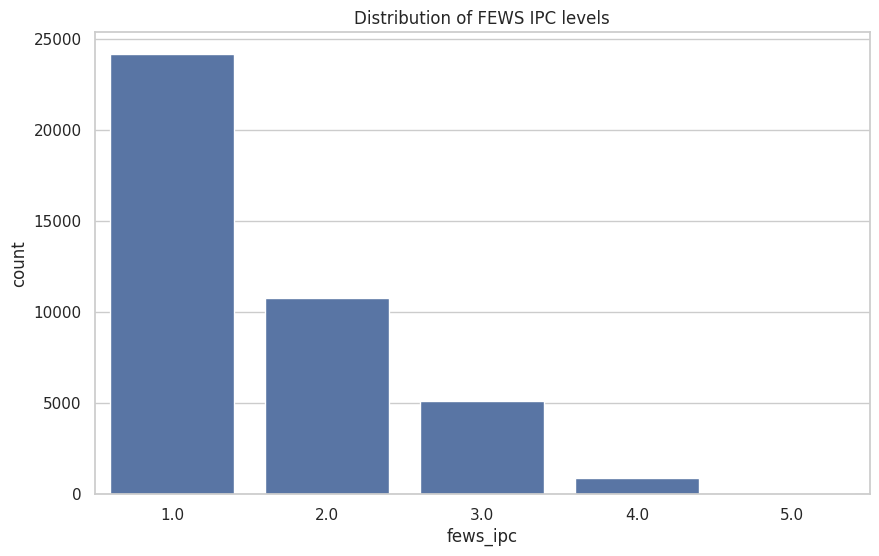

In [21]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="fews_ipc", data=df_time_series)
plt.title("Distribution of FEWS IPC levels")
plt.show()


The `fews ipc` column seems to be the IPC categorization from `fews.net` that will act as ground truth data. Interestingly, no classification is of a level 5. Good for the world I guess.

In [22]:
df_fews_ha = df_time_series.groupby(df_time_series["fews_ha"]).size().reset_index(name='counts')
pd.DataFrame(df_fews_ha)

,fews_ha,counts
0,0.0,27548
1,1.0,2174


In [23]:
df_fews_ha_more = (
    df_time_series
    .groupby(["fews_ha", "fews_ipc", "country"])
    .count()
    .reset_index()
)

pd.DataFrame(df_fews_ha_more)[df_fews_ha_more["fews_ha"] == 0]

,fews_ha,fews_ipc,country,index,admin_code,admin_name,centx,centy,year_month,year,...,carbon_2,mayhem_0,mayhem_1,mayhem_2,dehydrated_0,dehydrated_1,dehydrated_2,mismanagement_0,mismanagement_1,mismanagement_2
0,0.0,1.0,Afghanistan,568,568,568,568,568,568,568,...,568,568,568,568,568,568,568,568,568,568
1,0.0,1.0,Burkina Faso,887,887,887,887,887,887,887,...,842,842,842,842,842,842,842,842,842,842
2,0.0,1.0,Chad,1534,1534,1534,1534,1534,1534,1534,...,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473
3,0.0,1.0,Democratic Republic of Congo,89,89,89,89,89,89,89,...,78,78,78,78,78,78,78,78,78,78
4,0.0,1.0,Ethiopia,1067,1067,1067,1067,1067,1067,1067,...,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,4.0,Somalia,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
65,0.0,4.0,South Sudan,177,177,177,177,177,177,177,...,160,160,160,160,160,160,160,160,160,160
66,0.0,4.0,Sudan,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
67,0.0,4.0,Yemen,225,225,225,225,225,225,225,...,223,223,223,223,223,223,223,223,223,223


In [24]:
small_df = df_time_series[["mayhem_0", "fews_ha", "fews_ipc", "country", "year", "year_month", "month"]]

small_df = small_df[small_df["fews_ha"].notna()]

small_df.head(-50)

,mayhem_0,fews_ha,fews_ipc,country,year,year_month,month
11,-0.291333,0.0,1.0,Afghanistan,2012,2012_04,4
12,1.122000,0.0,1.0,Afghanistan,2012,2012_07,7
13,0.344667,0.0,1.0,Afghanistan,2012,2012_10,10
14,-0.470333,0.0,1.0,Afghanistan,2013,2013_01,1
15,0.085333,0.0,1.0,Afghanistan,2013,2013_04,4
...,...,...,...,...,...,...,...
40886,-0.430667,0.0,1.0,Zimbabwe,2012,2012_07,7
40887,1.378333,0.0,1.0,Zimbabwe,2012,2012_10,10
40888,-0.351667,0.0,1.0,Zimbabwe,2013,2013_01,1
40889,1.005667,0.0,1.0,Zimbabwe,2013,2013_04,4


In [25]:
df_fews_ha_more = (
    df_time_series
    .groupby(["fews_ha", "fews_ipc", "country"])
    .count()
    .reset_index()
)

pd.DataFrame(df_fews_ha_more)[df_fews_ha_more["fews_ha"] == 0]

,fews_ha,fews_ipc,country,index,admin_code,admin_name,centx,centy,year_month,year,...,carbon_2,mayhem_0,mayhem_1,mayhem_2,dehydrated_0,dehydrated_1,dehydrated_2,mismanagement_0,mismanagement_1,mismanagement_2
0,0.0,1.0,Afghanistan,568,568,568,568,568,568,568,...,568,568,568,568,568,568,568,568,568,568
1,0.0,1.0,Burkina Faso,887,887,887,887,887,887,887,...,842,842,842,842,842,842,842,842,842,842
2,0.0,1.0,Chad,1534,1534,1534,1534,1534,1534,1534,...,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473
3,0.0,1.0,Democratic Republic of Congo,89,89,89,89,89,89,89,...,78,78,78,78,78,78,78,78,78,78
4,0.0,1.0,Ethiopia,1067,1067,1067,1067,1067,1067,1067,...,1028,1028,1028,1028,1028,1028,1028,1028,1028,1028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,4.0,Somalia,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
65,0.0,4.0,South Sudan,177,177,177,177,177,177,177,...,160,160,160,160,160,160,160,160,160,160
66,0.0,4.0,Sudan,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
67,0.0,4.0,Yemen,225,225,225,225,225,225,225,...,223,223,223,223,223,223,223,223,223,223


I do not know what the fews_ha column means, It has only two values, 0 and 1. It could represent the number of hectares (ha) of land affected by food insecurity in a given district but how could that only be 0 or 1? I am not sure.

In [26]:
df_fews_proj_near = df_time_series.groupby(df_time_series["fews_proj_near"]).size().reset_index(name='counts')
pd.DataFrame(df_fews_proj_near)

,fews_proj_near,counts
0,1.0,19872
1,2.0,8275
2,3.0,4501
3,4.0,899
4,5.0,54


Going by the column values this seems just like IPC classification. However the name contains `proj` which could mean that this is a projected IPC classification. It likely refers to FEWS NET’s near-term food insecurity projection, predicting food security conditions within the next 3-6 months.

In [27]:
df_fews_proj_near_ha = df_time_series.groupby(df_time_series["fews_proj_near_ha"]).size().reset_index(name='counts')
pd.DataFrame(df_fews_proj_near_ha)

,fews_proj_near_ha,counts
0,0.0,29558
1,1.0,1957


`fews_proj_ha` is likely FEWS NET’s projected number of hectares affected by food insecurity in the future as it has the same values as `fews_ha` but column name contains `proj`.

> We then convert each text feature into an indicator equal to one if it is mentioned in an article and zero otherwise. Each news indicator is constructed by counting the cooccurrences of a text feature and geographic mentions. 

Now, lets look at the value of the columns that end with `_0`, `_1` and `_2`. I think these are the extracted text features from the news articles at the district, province and country level.

In [28]:
df_time_series[["flee_0", "country", "admin_name", "year_month"]].head(5)

,flee_0,country,admin_name,year_month
0,0.087000,Afghanistan,Kandahar,2009_07
1,-0.881172,Afghanistan,Kandahar,2009_10
2,1.412000,Afghanistan,Kandahar,2010_01
3,-0.621747,Afghanistan,Kandahar,2010_04
4,-0.883506,Afghanistan,Kandahar,2010_07


Okay so the next step is identifying what `centx` and `centy` mean. I think these are the coordinates of the district. I will check this by plotting the districts on a map.

In [29]:
centx_max_min = df_time_series["centx"].max(), df_time_series["centx"].min()
centy_max_min = df_time_series["centy"].max(), df_time_series["centy"].min()

print("The maximum and minimum values for 'centx' are: ", centx_max_min)
print("The maximum and minimum values for 'centy' are: ", centy_max_min)

The maximum and minimum values for 'centx' are:  (np.float64(71.45595), np.float64(-91.9314))
The maximum and minimum values for 'centy' are:  (np.float64(37.03775), np.float64(-25.9617))


In [30]:
df = df_time_series[:50]  
map_center = [df["centy"].mean(), df["centx"].mean()]
m = folium.Map(location=map_center, zoom_start=5)


for _, row in df.iterrows():
    folium.Marker(
        location=[row["centy"], row["centx"]],
        popup=row["admin_name"], 
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

m

Seems to me that these are indeed longitude and latitude coordinates of the districts.

## Some notes on the data

### **Understanding the Different Columns in the Data (Based on the Paper & Code)**  

The dataset used in the **food insecurity prediction model** consists of various **traditional risk factors, news-based indicators, and IPC classifications**. 

#### **1️⃣ General Column Categories**
| **Column Type** | **Examples** | **Meaning** |
|---------------|-----------|------------|
| **Administrative Identifiers** | `admin_code`, `admin_name`, `year`, `month` | Identifies the **district, year, and month** for each data point. |
| **IPC Classification** | `fews_ipc` | The **food insecurity phase** (IPC scale 1-5) for a given district & time. |
| **Traditional Risk Factors** | `rain_mean`, `rain_anom`, `conflict_count`, `food_price` | Climate, economic, and conflict-related risk factors. |
| **News-Based Features** | `drought_0`, `famine_1`, `displacement_2` | Text features extracted from **news articles**, indicating frequency of crisis-related terms. |
| **Lagged Features** | `fews_ipc_3`, `rainfall_6` | Past values of a variable (used to capture historical trends). |


#### **2️⃣ What Do `_0`, `_1`, `_2` Mean?**
The **suffixes `_0`, `_1`, `_2`** in the dataset **represent different levels of geographic aggregation**.  I THINK! 

| **Suffix** | **Interpretation** | **Example** |
|-----------|------------------|-----------|
| **`_0`** | **District-Level (Local Impact)** | `drought_0` → How often "drought" appears in news **for the specific district**. |
| **`_1`** | **Province-Level (Regional Impact)** | `drought_1` → Frequency of "drought" mentions **for the province** (aggregated across all districts in it). |
| **`_2`** | **Country-Level (National Impact)** | `drought_2` → Frequency of "drought" mentions **for the entire country**. |

🔹 **Why This Matters?**  
- These levels **capture how crises propagate** from local to regional and national levels.  
- **District-level (`_0`) features are direct indicators of food insecurity.**  
- **Province (`_1`) & Country (`_2`) features account for broader shocks (e.g., drought in one district affecting neighboring areas).**  (BOOTIFUL)


#### **3️⃣ Why Are These Columns Important?**
1. **📉 Lagged Features for Trend Analysis**
   - **Example:** `fews_ipc_3` → IPC value **3 months ago**.
   - The model learns from **historical trends** to predict future food insecurity.

2. **📰 News-Based Indicators for Early Warning**
   - News mentions (`famine_0`, `hunger_1`, `migration_2`) act as **early warning signals**.
   - These columns **capture crisis events before they impact food security levels**.

3. **🌍 Multi-Level Aggregation for Broader Impact**
   - The suffixes `_0`, `_1`, `_2` allow the model to detect **local vs. national trends**.
   - Example: **A drought at the country level (`_2`) might influence multiple districts (`_0`).**


### **4️⃣ Key Takeaways**
✅ **Columns ending in `_0`, `_1`, `_2` represent district, province, and country-level aggregation.**  
✅ **Traditional features & news indicators are lagged** to model past trends.  
✅ **News-based columns capture early signals** of food insecurity before it escalates.  
✅ **Multi-scale aggregation allows for a more comprehensive prediction model.**  

---

### **How Do We Know That `_0`, `_1`, `_2` Represent District, Province, and Country-Level Aggregation?**  

This conclusion is based on **three main sources**:  

1️⃣ **The Paper's Explanation**  
2️⃣ **The Structure of the Dataset**  
3️⃣ **The Code in `source_rf_regression_modelling.ipynb`**

### **🔍 1️⃣ Evidence from the Paper**  
The paper explicitly states that **features are computed at three levels**:

> *"The terms \( v_{k,p,t} \), \( x_{w,p,t} \), \( v_{k,c,t} \), and \( x_{w,c,t} \) account for shocks occurring in the province or the country that district \( d \) belongs to and that could affect the IPC phase in the district."*

> In other words, we collect district-month–level data on ninetime-varying risk factors describing five different types of riskand district-level data on five time-invariant risk factors (fig. S6).The dataset covers 21 of the 37 countries in the FEWS NETdataset—Afghanistan, Burkina Faso, Chad, Democratic Republicof the Congo, Ethiopia, Guatemala, Haiti, Kenya, Malawi, Mali,Mauritania, Mozambique, Niger, Nigeria, Somalia, South Sudan,Sudan, Uganda, Republic of Yemen, Zambia, and Zimbabwe—over the period from July 2009 to July 2020.

This shows that the paper has district level data which then it aggregates at the province and country level. 

The paper also mentions the following:
- \( v_{k,d,t} \) → **Time-varying traditional factor at the district level.**  
- \( v_{k,p,t} \) → **Same factor aggregated at the province level.**  
- \( v_{k,c,t} \) → **Same factor aggregated at the country level.**  

Similarly, for news-based factors:
- \( x_{w,d,t} \) → **News feature at the district level.**  
- \( x_{w,p,t} \) → **News feature at the province level.**  
- \( x_{w,c,t} \) → **News feature at the country level.**  

Thus, in the dataset, **the suffixes `_0`, `_1`, and `_2` align with district, province, and country levels**.


### **📊 2️⃣ Evidence from the Dataset Structure**  

- The dataset contains **repeating feature names** with **only `_0`, `_1`, `_2` differing**.
- Example:

| **Feature Name**  | **Likely Meaning** |
|-------------------|-------------------|
| `famine_0`       | **District-level** famine mentions |
| `famine_1`       | **Province-level** famine mentions (aggregated across all districts) |
| `famine_2`       | **Country-level** famine mentions (aggregated across all provinces) |

- This pattern holds across **multiple text features** like `conflict_0`, `conflict_1`, `conflict_2`.


### **💻 3️⃣ Evidence from the Code (`source_rf_regression_modelling.ipynb`)**  
The notebook contains **explicit feature aggregation steps** that confirm `_0`, `_1`, `_2` refer to different geographic levels.

For example, in the **feature engineering process**, the notebook:  
1. **Generates new columns for each feature** at **different aggregation levels**.  
2. **Applies province-level and country-level averages** to district level data by extracting olcumns that end in `_0`.  

Relevant code snippet:
```python
news_factors = [name for name in time_series.columns.values if '_0' in name]

def add_agg_factors(features, level='province'):
    grouped_df = time_series.groupby(['year_month', level]).mean()
    for f in features:
        time_series['{}_{}'.format(f, level)] = time_series.apply(lambda x: grouped_df.loc[x['year_month'], x[level]][f], axis=1)
```
This means:
- It **computes province and country-level aggregations** from district-level data.
- The **suffix `_province` and `_country` correspond to `_1` and `_2`**.


### **📌 Final Conclusion**  
✅ **Suffix `_0` corresponds to district-level data.**  
✅ **Suffix `_1` corresponds to province-level aggregation.**  
✅ **Suffix `_2` corresponds to country-level aggregation.**  

This is confirmed by:
1. **The theoretical model in the paper.**  
2. **The dataset’s structure and column naming.**  
3. **The feature aggregation code in the provided notebook.**  


---

### Why the Aggregation is Redone?
Okay so if the aggregations are already done in the form of columns ending in _1 and _2, why is it being done again in the code?
Even though **province and country-level features exist in the dataset (columns ending in _1, _2)**, the additional aggregation steps **ensure consistency** in feature engineering. The aggregation process accounts for:

1. **Missing Data Handling** – Some features at the province/country level might have missing values, so recomputing ensures completeness.
2. **Lagging Data** – Some aggregations are performed **after** lagging the time-series data, requiring recalculation.
3. **Rolling Aggregations** – Some features might need rolling averages or weighted combinations over different time windows.

Thus, the paper ensures robustness by explicitly **recomputing aggregations** rather than relying solely on precomputed features in the dataset.

---

If we are performing aggregations from scratch, then can we drop the `_1` and `_2` columns because they are redundant? 

However, before doing that, consider the following:

### **✔ When You CAN Drop `_1` and `_2` Columns**
✅ **If you are recalculating province- and country-level aggregations** from scratch using your own methodology.  
✅ **If the `_1` and `_2` columns contain inconsistencies or missing data**, and you prefer to compute fresh, consistent aggregations.  
✅ **If your aggregation logic involves different techniques** (e.g., rolling averages, weighted aggregation, or normalization beyond what's in `_1`, `_2`).  
✅ **If you want complete control over how province- and country-level values are computed** rather than relying on precomputed ones.

### **⚠ When You SHOULD Keep `_1` and `_2` Columns**
❌ **If you want a quick, precomputed alternative** instead of redoing aggregations from raw data.  
❌ **If you are unsure whether the precomputed aggregations match the ones in the paper exactly** (they may have specific pre-processing steps).  
❌ **If you're using the original model without modification**—it might be designed to use these columns directly.  

### **Final Decision?**
- If your goal is **full replication from raw data**, **drop `_1` and `_2`** and recompute province/country aggregations from scratch.
- If you want **a shortcut**, keep them and validate whether they match what you would compute.


---

The **`fews_proj_near`** variable is used in the model as an **expert forecast** for food insecurity. According to the supplementary material of the paper, this variable represents **expert predictions of food insecurity** for a given district, typically based on the FEWS NET projections. It serves as a benchmark for comparison against the **traditional+news** model predictions.

### **How is `fews_proj_near` Used?**
1. **Included in Regression Models:**
   - It is explicitly used in models that incorporate expert projections.
   - The **"expert"** model only uses `fews_proj_near_3` as the input.
   - The **"expert + traditional"** model combines it with traditional factors.
   - The **"expert + news"** model integrates it with news-based features.

2. **Time Lagging:**
   - The model incorporates **`fews_proj_near_3`**, which means the **projection from 3 months ago** is used for prediction.
   - This ensures that the model only relies on past information, preventing data leakage.

3. **Comparison Against Other Models:**
   - The **traditional+news model** is compared to expert forecasts (`fews_proj_near`) in terms of **Root Mean Squared Error (RMSE)**.
   - Fig. S8 in the supplementary material shows RMSE comparisons of predictions **3 months ahead** using expert forecasts and **random forest regressions**.

### **Why is `fews_proj_near` Important?**
- It provides a **baseline** for evaluating model performance.
- It helps **validate** the effectiveness of incorporating news-based indicators into predictions.
- By omitting `fews_proj_near`, the study can assess whether **news and traditional factors alone** can predict food crises without relying on expert judgment.
